# 월마트 판매

## #01. 준비작업

### [1] 패키지 참조

In [31]:
import sys
import os
work_path = os.path.abspath(os.path.join(os.getcwd(), "../../.."))
sys.path.append(work_path)

from helper.regrassion import *
from helper.util import *
from helper.plot import *
from helper.analysis import *

### [2] 데이터 가져오기

주요 소매업체의 매출에 영향을 미칠 수 있는 요소 찾기

https://www.kaggle.com/datasets/mikhail1681/walmart-sales


| 변수명 | 설명 |
|:--:|--:|
| Store | Store number |
| Date | Sales week start date |
| Weekly_Sales | Store week sales |
| Holiday_Flag | Mark on the presence or absence of a holiday |
| Temperature | Air temperature in the region |
| Fuel_Price | Fuel cost in the region |
| CPI | Consumer price index(소비자 물가 지수) |
| Unemployment | Unemployment rate |

In [32]:
origin = my_read_data("./res/Walmart_sales.csv", info = False)
my_pretty_table(origin.head())
df = origin.copy()

+----+---------+------------+----------------+----------------+---------------+--------------+---------+----------------+
|    |   Store | Date       |   Weekly_Sales |   Holiday_Flag |   Temperature |   Fuel_Price |     CPI |   Unemployment |
|----+---------+------------+----------------+----------------+---------------+--------------+---------+----------------|
|  0 |       1 | 05-02-2010 |    1.64369e+06 |              0 |         42.31 |        2.572 | 211.096 |          8.106 |
|  1 |       1 | 12-02-2010 |    1.64196e+06 |              1 |         38.51 |        2.548 | 211.242 |          8.106 |
|  2 |       1 | 19-02-2010 |    1.61197e+06 |              0 |         39.93 |        2.514 | 211.289 |          8.106 |
|  3 |       1 | 26-02-2010 |    1.40973e+06 |              0 |         46.63 |        2.561 |  211.32 |          8.106 |
|  4 |       1 | 05-03-2010 |    1.55481e+06 |              0 |          46.5 |        2.625 |  211.35 |          8.106 |
+----+---------+--------

In [33]:
df_date = df[['Date','Weekly_Sales']].groupby('Date').mean().sort_values('Weekly_Sales').reset_index()
map_date = {}
for i,v in enumerate(df_date['Date']):
    map_date[v] = df_date['Weekly_Sales'][i]
df['Date_value'] = df['Date'].map(map_date)

In [34]:

df_store = df[['Store','Weekly_Sales']].groupby('Store').mean().sort_values('Weekly_Sales').reset_index()
map_store = {}
for i,v in enumerate(df_store['Store']):
    map_store[v] = df_store['Weekly_Sales'][i]
df['Store_value'] = df['Store'].map(map_store)


In [35]:
df2 = df.drop(['Store','Date'],axis=True)
df2.dtypes

Weekly_Sales    float64
Holiday_Flag      int64
Temperature     float64
Fuel_Price      float64
CPI             float64
Unemployment    float64
Date_value      float64
Store_value     float64
dtype: object

In [36]:
df2['Holiday_Flag'] = df2['Holiday_Flag'].astype('uint8') 

In [37]:
df2.columns

Index(['Weekly_Sales', 'Holiday_Flag', 'Temperature', 'Fuel_Price', 'CPI',
       'Unemployment', 'Date_value', 'Store_value'],
      dtype='object')

In [38]:
# 2차항 만들기
df2['Temperature2'] = df2['Temperature']**2
df2['Temperature3'] = df2['Temperature']**3
df2['Fuel_Price2'] = df2['Fuel_Price']**2
df2['CPI2'] = df2['CPI']**2
df2['Unemployment2'] = df2['Unemployment']**2


In [39]:
df2.describe()

,Weekly_Sales,Holiday_Flag,Temperature,Fuel_Price,CPI,Unemployment,Date_value,Store_value,Temperature2,Temperature3,Fuel_Price2,CPI2,Unemployment2
count,6.435000e+03,6435.000000,6435.000000,6435.000000,6435.000000,6435.000000,6.435000e+03,6.435000e+03,6435.000000,6.435000e+03,6435.000000,6435.000000,6435.000000
mean,1.046965e+06,0.069930,60.663782,3.358607,171.578394,7.999151,1.046965e+06,1.046965e+06,4020.257179,2.830428e+05,11.490906,30987.855331,67.504814
std,5.643666e+05,0.255049,18.444933,0.459020,39.356712,1.875885,1.205680e+05,5.405605e+05,2157.763464,2.082370e+05,3.068967,13617.643212,34.769820
min,2.099862e+05,0.000000,-2.060000,2.472000,126.064000,3.879000,8.799967e+05,2.598617e+05,4.243600,-8.741816e+00,6.110784,15892.132096,15.046641
25%,5.533501e+05,0.000000,47.460000,2.933000,131.735000,6.891000,9.971628e+05,5.564039e+05,2252.452500,1.069015e+05,8.602489,17354.110225,47.485881
50%,9.607460e+05,0.000000,62.670000,3.445000,182.616521,7.874000,1.027642e+06,9.667816e+05,3927.528900,2.461382e+05,11.868025,33348.793560,61.999876
75%,1.420159e+06,0.000000,74.940000,3.735000,212.743293,8.622000,1.062812e+06,1.395901e+06,5616.003700,4.208633e+05,13.950225,45259.708921,74.338884
max,3.818686e+06,1.000000,100.140000,4.468000,227.232807,14.313000,1.798476e+06,2.107677e+06,10028.019600,1.004206e+06,19.963024,51634.748486,204.861969


In [40]:
# `Holiday_Flag`
my_anova(df2[['Holiday_Flag','Weekly_Sales']],hue = 'Holiday_Flag',target = 'Weekly_Sales')

pingouin.anova
+----+--------------+-------------+------+-------------+---------+-----------+------------+
|    | Source       |          SS |   DF |          MS |       F |     p-unc |        np2 |
|----+--------------+-------------+------+-------------+---------+-----------+------------|
|  0 | Holiday_Flag | 2.78897e+12 |    1 | 2.78897e+12 | 8.76688 | 0.0030787 | 0.00136094 |
|  1 | Within       |  2.0465e+15 | 6433 | 3.18126e+11 |     nan |       nan |        nan |
+----+--------------+-------------+------+-------------+---------+-----------+------------+

statsmodels.anova.anova_lm
+-----------------+------+-------------+-------------+---------+-----------+
|                 |   df |      sum_sq |     mean_sq |       F |    PR(>F) |
|-----------------+------+-------------+-------------+---------+-----------|
| C(Holiday_Flag) |    1 | 2.78897e+12 | 2.78897e+12 | 8.76688 | 0.0030787 |
| Residual        | 6433 |  2.0465e+15 | 3.18126e+11 |     nan |       nan |
+-----------------+-

In [41]:
# 표준화
df3 = my_standard_scaler(df2, 'Weekly_Sales')
df3.head()

,Temperature,Fuel_Price,CPI,Unemployment,Date_value,Store_value,Temperature2,Temperature3,Fuel_Price2,CPI2,Unemployment2,Holiday_Flag,Weekly_Sales
0,-0.995136,-1.713800,1.004175,0.056964,0.486130,0.940392,-1.033614,-0.995588,-1.588841,0.996859,-0.051703,0,1643690.90
1,-1.201170,-1.766089,1.007880,0.056964,0.225480,0.940392,-1.175956,-1.085058,-1.628884,1.001382,-0.051703,1,1641957.44
2,-1.124178,-1.840166,1.009074,0.056964,0.214478,0.940392,-1.124331,-1.053585,-1.684968,1.002839,-0.051703,0,1611968.17
3,-0.760907,-1.737766,1.009849,0.056964,-0.579681,0.940392,-0.855536,-0.872403,-1.607241,1.003786,-0.051703,0,1409727.59
4,-0.767955,-1.598328,1.010624,0.056964,-0.044598,0.940392,-0.861147,-0.876465,-1.499084,1.004733,-0.051703,0,1554806.68


In [42]:
yname = 'Weekly_Sales'
x_train, x_test, y_train, y_test = my_train_test_split(df3, yname, test_size=0.2)
my_linear_regrassion(x_train, y_train, x_test, y_test, use_plot=False, report=True)

[회귀식]
Weekly_Sales = 331.895 * Temperature + 139310.446 * Fuel_Price + 40189.353 * CPI + -24114.863 * Unemployment + 116779.487 * Date_value + 539471.595 * Store_value + 75042.356 * Temperature2 + -73519.804 * Temperature3 + -141396.549 * Fuel_Price2 + -42740.853 * CPI2 + 21323.172 * Unemployment2 + 3192.465 * Holiday_Flag + 1046576.021

[회귀분석 성능평가]
+--------+----------------+---------------------+---------------------+------------------+---------------------------------+-----------------------+
|        |   결정계수(R2) |   평균절대오차(MAE) |   평균제곱오차(MSE) |   평균오차(RMSE) |   평균 절대 백분오차 비율(MAPE) |   평균 비율 오차(MPE) |
|--------+----------------+---------------------+---------------------+------------------+---------------------------------+-----------------------|
| 데이터 |       0.964692 |             66541.3 |         1.14075e+10 |           106806 |                         7.74085 |             -0.437718 |
+--------+----------------+---------------------+---------------------+------------------+-

LinearRegression(n_jobs=-1)

[회귀식]
Weekly_Sales = 116712.215 * Date_value + 540663.654 * Store_value + 1046742.547

[회귀분석 성능평가]
+--------+----------------+---------------------+---------------------+------------------+---------------------------------+-----------------------+
|        |   결정계수(R2) |   평균절대오차(MAE) |   평균제곱오차(MSE) |   평균오차(RMSE) |   평균 절대 백분오차 비율(MAPE) |   평균 비율 오차(MPE) |
|--------+----------------+---------------------+---------------------+------------------+---------------------------------+-----------------------|
| 데이터 |       0.964066 |             68354.1 |         1.16098e+10 |           107749 |                         7.92748 |             -0.407544 |
+--------+----------------+---------------------+---------------------+------------------+---------------------------------+-----------------------+

[선형회귀분석 결과보고]
+----+--------------+-------------+--------------------+------------+------------------+---------+------------+---------+
|    | 종속변수     | 독립변수    |   B(비표준화 계수) |   표준오차 |   β(표준

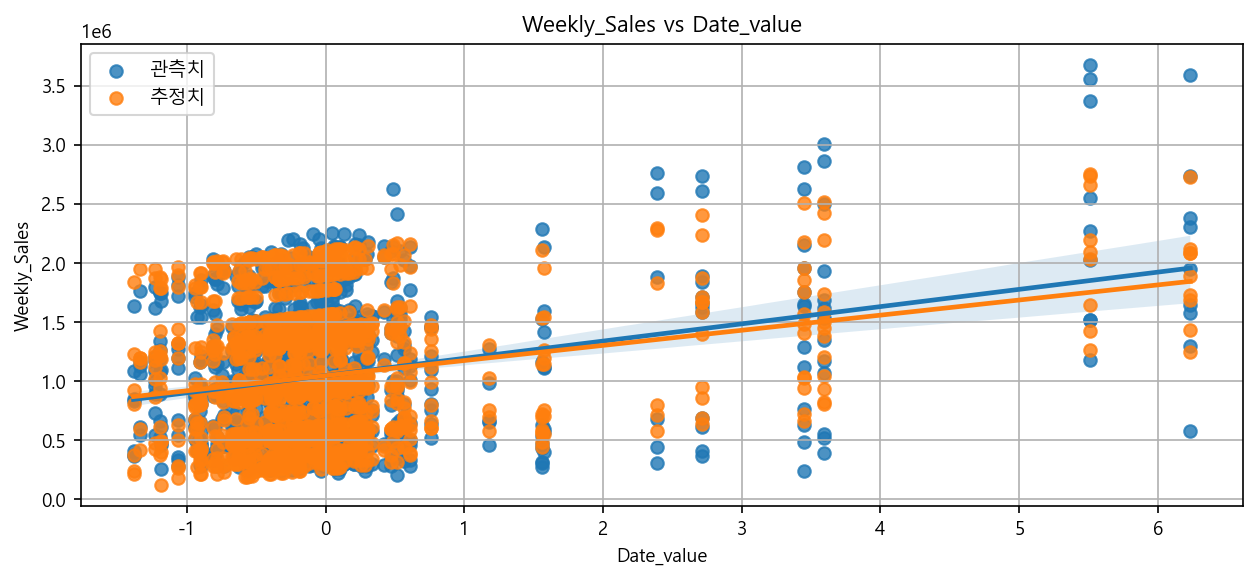

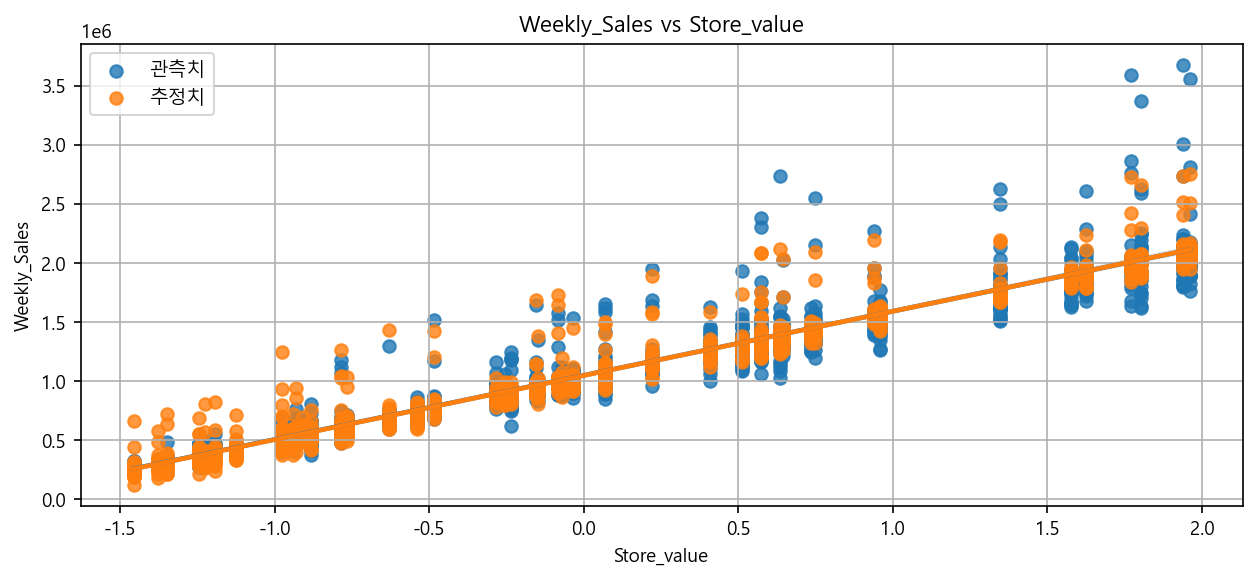



[잔차의 가정 확인] ==============================
[잔차의 선형성 가정]


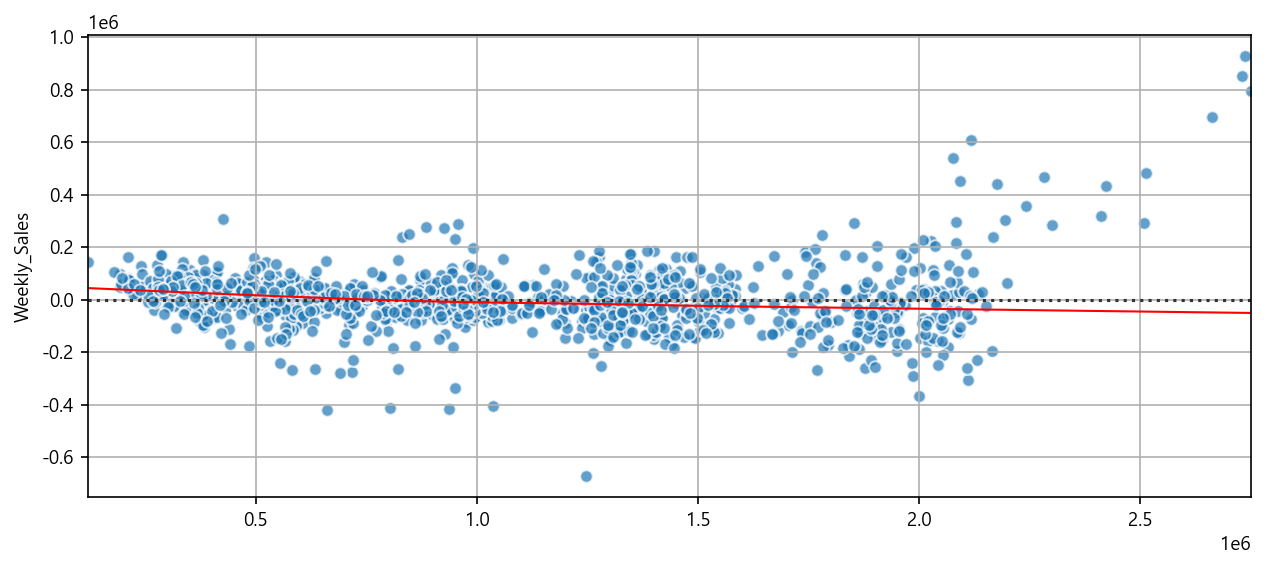


[잔차의 정규성 가정]


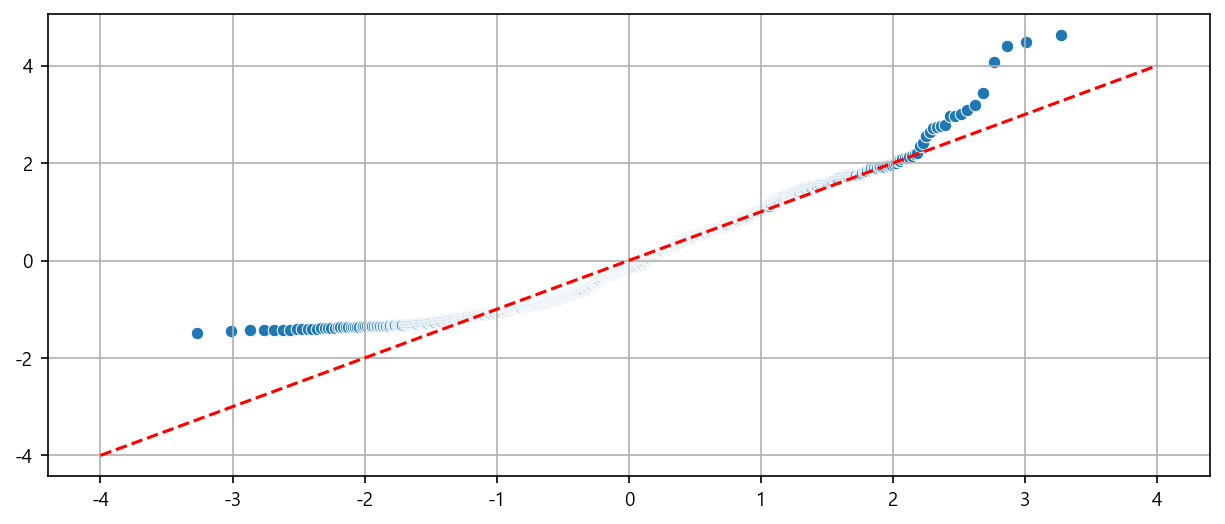

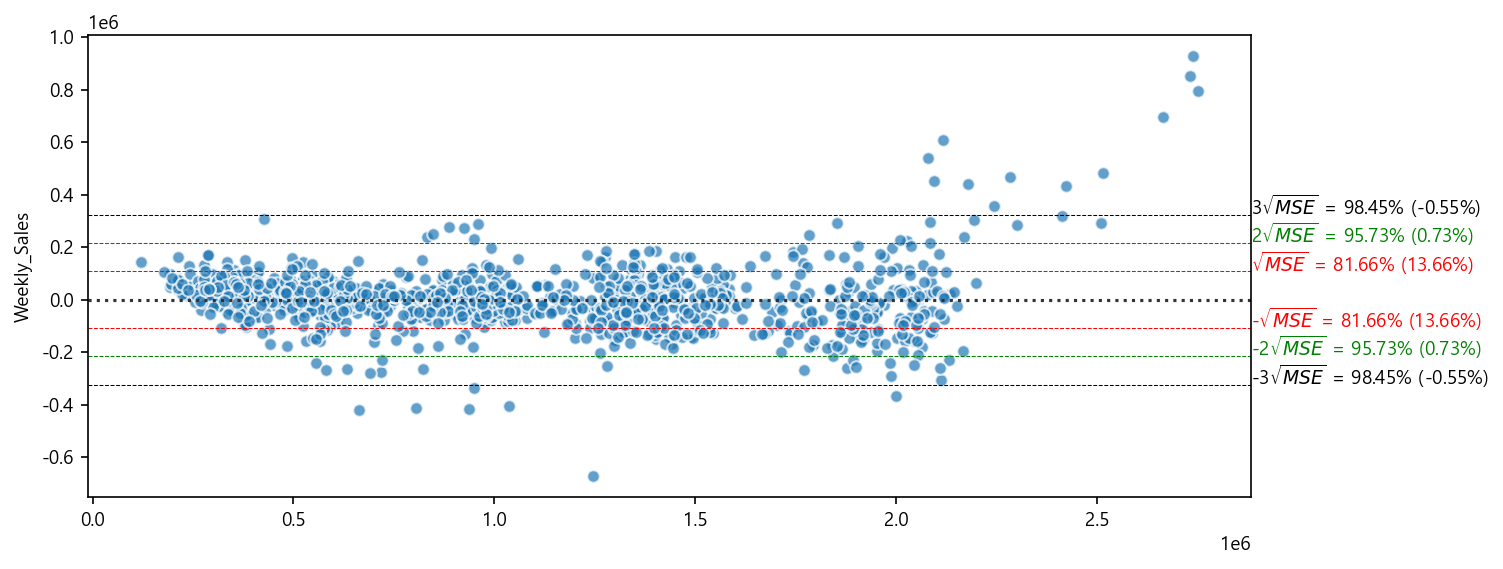

루트 1MSE 구간에 포함된 잔차 비율: 81.66% (13.662781662781654)
루트 2MSE 구간에 포함된 잔차 비율: 95.73% (0.7264957264957275)
루트 3MSE 구간에 포함된 잔차 비율: 98.45% (-0.5540015540015446)
잔차의 정규성 가정 충족 여부: False

[잔차의 등분산성 가정]
잔차의 등분산성 가정 충족 여부: False
+-----------+-------------+
|           |      values |
|-----------+-------------|
| statistic |      347.05 |
| p-value   | 4.35632e-76 |
| f-value   |      237.04 |
| f p-value | 2.42058e-88 |
+-----------+-------------+

[잔차의 독립성 가정]
Durbin-Watson: 1.9629341836184047, 잔차의 독립성 가정 만족 여부: True


LinearRegression(n_jobs=-1)

In [45]:
# VIF, 유의확률로 변수 제거

ignore = ['CPI2','Fuel_Price2','Temperature2','Unemployment2','Unemployment','Holiday_Flag','CPI','Fuel_Price','Temperature','Temperature3']
x_train2 = x_train.drop(ignore,axis=1)
x_test2 = x_test.drop(ignore,axis=1)
my_linear_regrassion(x_train2, y_train, x_test2, y_test, use_plot=True, resid_test=True)